Formação Python para Data Science - Alura.


Aluno: Thiago William  
dezembro/2024

In [43]:
import pandas as pd

In [77]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
data = pd.read_csv(url, sep=';')
data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


# Curso 04 - Pandas: Conhecendo a biblioteca.

## 01. Conhecendo a base de dados

### Exercícios - Bora Praticar?

#### Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.

In [108]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados_alunos = pd.read_csv(url)

#### Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.

In [109]:
dados_alunos.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [110]:
dados_alunos.tail()

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


#### Confira a quantidade de linhas e colunas desse DataFrame.

In [111]:
dados_alunos.shape

(18, 4)

#### Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.

In [112]:
dados_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


#### Extra: Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc). Dica: pesquise pelo método describe.

In [113]:
dados_alunos.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


## 02. Análise exploratória de dados

### Conceitos

Podemos agrupar os dados, usando o método ```.groupby('coluna')``` onde temos que passar, após, um método de agrupamento (sum, avg, mean). Por exemplo:

```python
dados_alugueis.groupby('Tipo').mean(numeric_only=True) # O parâmetro numeric_only força a calcular a média apenas das colunas numéricas
```
Da maneira acima, ele trará a média de todas as colunas numéricas do conjunto de dados, agrupado pelo tipo de imóveis. Para trazer apenas uma coluna específica faze-se:

```python
dados_alugueis.groupby('Tipo')[['Valor']].mean(numeric_only=True)
```
Podemos, também, ordenar a saída, vamos fazer isso pela coluna valor:

```python
dados_alugueis.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values('Valor')
```

O método ```groupby()``` tem alguns parâmetros relevantes, a saber:
* **by**: Qual coluna ou colunas será agrupado.
* **axis**: Qual eixo será agrupado, padrão é 0 -> linhas.
* **sort**: Indica se o valor deve ser ordenado pela coluna de agrupamento.
* **dropna**: Indica se deve remover os valores NA

Agora, vamos olhar o método ```query()```. Esse método permite que façamos consultas no dataFrame, usando estrutura similar ao SQL. Esse método permite passar uma variável na consulta. Imagina que no nosso conjunto nós queiramos filtrar essa base pelo tipo de i

```python
variavel = [] #imagina que variável seja uma lista de valores da coluna "Coluna1"
dados.query('@variavel in Coluna1') #Ele irá filtrar a Coluna1 e trará apenas o que estiver em variavel.
```

Agora, vejamos alguns métodos interessantes do pandas:

* ```.value_counts() ```: Conta a quantidade de vezes que um valor aparece,
* ```.value_counts(normalize=True) ```: Traz a quantidade de vezes normalizada (0 -> 1)
* ```.rename(columns={'Nome_Anterior': 'Nome_Novo'}, inplace=True) ```: Renomeia as colunas
* ``` ```:

### Exercícios - Bora Praticar?

O time de ML chegou com algumas demandas de última hora para resolvermos nesse momento da análise exploratória. Essas demandas são:

#### Calcular a média de quartos por apartamento;


In [114]:
# Preparando a base
dados_apartamentos = data.query('Tipo == "Apartamento"')
dados_apartamentos.Quartos.mean(numeric_only=True)

2.481568707761622

#### Conferir quantos bairros únicos existem na nossa base de dados;


In [115]:
bairros = list(dados_apartamentos.Bairro.unique())
print(len(bairros))

149



#### Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [116]:
df_bairros = dados_apartamentos.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False)
df_bairros

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
...,...
Inhoaíba,650.000000
Cosmos,610.000000
Santa Cruz,590.000000


#### Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

<Axes: ylabel='Bairro'>

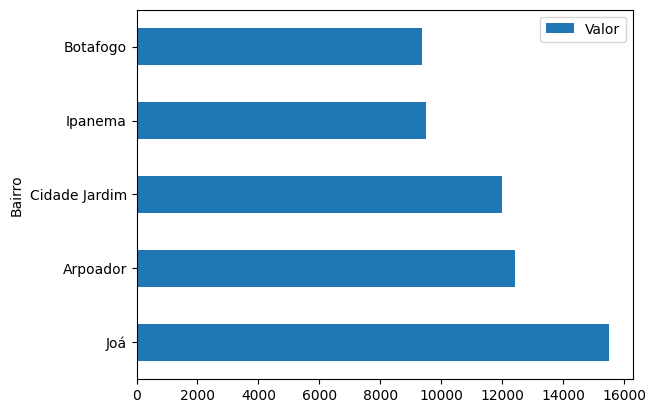

In [117]:
df_bairros.head().plot(kind='barh')

## 03. Tratando e filtrando dados

### Conceitos

Lidando com dados nulos e o pandas.

* ```.dropna() ```: Remove todos os valores NA.
* ```.fillnaa() ```: Preenche todos os valores NA: ```method=ffil, bfill```
* ```.interpolate() ```: Preenche os valores NA com interpolação

Além disso, muitas vezes devemos remover os valores estranhos. Podemos fazer isso criando uma query para filtrar o conjunto de dados, como pode ser visto nesse exemplo:

```python
filtro = df.query('condicao1 | condicao2').index
# Ex: filtro = df.query('Valor == 0 | Condominio == 0')
df.drop(filtro, axis=0)
```



### Exercícios - Bora praticar?

Com base no conjunto de dados 'alunos.csv' resolva os problemas propostos utilizando os conhecimentos adquiridos até aqui.

#### Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

In [118]:
dados_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


In [119]:
dados_alunos.isna().sum()

,0
Nome,0
Idade,0
Notas,6
Aprovado,0


Podemos ver que a coluna notas possui 6 valores nulos. 6 valores em 18 corresponde a 33% dos valores nulos, por isso não vou eliminar esses valores. Vou interpolar valores e irei corrigir os aprovados.

In [120]:
#dados_alunos['Notas'].fillna(dados_alunos['Notas'].mean())
dados_alunos['Notas'].interpolate(method='ffill', inplace=True)
dados_alunos.isna().sum()

<ipython-input-120-2ce61991e7b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_alunos['Notas'].interpolate(method='ffill', inplace=True)
<ipython-input-120-2ce61991e7b7>:2: FutureWarning: Series.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_alunos['Notas'].interpolate(method='ffill', inplace=True)


,0
Nome,0
Idade,0
Notas,0
Aprovado,0


In [121]:
dados_alunos['Aprovado'] = dados_alunos['Notas'].apply(lambda x: True if x >=6 else False)
dados_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,7.5,True
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,10.0,True
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,5.6,False


#### Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

In [122]:
indices = dados_alunos.query('Nome == "Alice" | Nome == "Carlos"').index
dados_alunos.drop(indices, axis=0)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,7.5,True
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,10.0,True
6,Dara,21,7.0,True
9,Vitor,28,5.6,False
10,Daniel,21,5.6,False
11,Igor,24,4.5,False


#### Aplique um filtro que selecione apenas os alunos que foram aprovados.

In [123]:
aprovados = dados_alunos['Aprovado'] == True
dados_alunos[aprovados]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,7.5,True
4,Beto,21,10.0,True
5,Bruna,23,10.0,True
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
14,Paulo,37,9.0,True
15,Mylena,29,7.0,True


#### Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".


In [124]:
alunos_aprovados = dados_alunos[aprovados]
alunos_aprovados.to_csv('alunos_aprovados.csv', index=False, sep=';')

#### Extra: Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade, tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. Dica: pesquise pelo método replace.

In [125]:
alunos_aprovados.replace({'Notas': 7}, 8)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,7.5,True
4,Beto,21,10.0,True
5,Bruna,23,10.0,True
6,Dara,21,8.0,True
7,Carlos,19,6.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
14,Paulo,37,9.0,True
15,Mylena,29,8.0,True


In [126]:
alunos_aprovados.to_csv('alunos_aprovados.csv', index=False, sep=';')

## 04. Manipulando dados

### Exercícios - Bora praticar?

#### Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.


In [127]:
dados_alunos['Pontos_extras'] = dados_alunos['Notas'] * 0.4
dados_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.00
1,Ana,18,7.5,True,3.00
2,Cátia,27,2.5,False,1.00
3,Denis,18,5.0,False,2.00
4,Beto,21,10.0,True,4.00
5,Bruna,23,10.0,True,4.00
6,Dara,21,7.0,True,2.80
7,Carlos,19,6.0,True,2.40
8,Alice,35,5.6,False,2.24
9,Vitor,28,5.6,False,2.24


#### Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.



In [128]:
dados_alunos['Notas_finais'] = dados_alunos['Notas'] + dados_alunos['Pontos_extras']
dados_alunos


,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.00,10.50
1,Ana,18,7.5,True,3.00,10.50
2,Cátia,27,2.5,False,1.00,3.50
3,Denis,18,5.0,False,2.00,7.00
4,Beto,21,10.0,True,4.00,14.00
5,Bruna,23,10.0,True,4.00,14.00
6,Dara,21,7.0,True,2.80,9.80
7,Carlos,19,6.0,True,2.40,8.40
8,Alice,35,5.6,False,2.24,7.84
9,Vitor,28,5.6,False,2.24,7.84


#### Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores - True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6), False: caso o aluno esteja reprovado (nota final deve ser menor que 6).

In [129]:
dados_alunos['Aprovado_final'] = dados_alunos['Notas_finais'].apply(lambda x: True if x >=6 else False)
dados_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.00,10.50,True
1,Ana,18,7.5,True,3.00,10.50,True
2,Cátia,27,2.5,False,1.00,3.50,False
3,Denis,18,5.0,False,2.00,7.00,True
4,Beto,21,10.0,True,4.00,14.00,True
5,Bruna,23,10.0,True,4.00,14.00,True
6,Dara,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,True,2.40,8.40,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,5.6,False,2.24,7.84,True


#### Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [130]:
selecao_aprovados = (dados_alunos['Aprovado'] == False) & (dados_alunos['Aprovado_final'] == True)
dados_alunos[selecao_aprovados]

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,5.6,False,2.24,7.84,True
10,Daniel,21,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
